# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Leanne  | Lane | Leanne Lane, 29-11-24  | 5 | 25% |
| Member 2: | Jalelle | Dinka | Jalelle Dinka, 29-11-24 | 5 | 25% |
| Member 3: | Navneet | Robin | Navneet Robin, 29-11-24 | 5 | 25% |
| Member 4: | Mahweer | Kumar | Mahweer Kumar,29-11-24 | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [3]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [7]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [15]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('svc', SVC())                 # Default classifier (SVC)
])
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [16]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

In [17]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [18]:
# TODO: Print the results from the grid search
# (2 marks)

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

print("Best params:\n{}".format(grid.best_params_))

best_train_score = grid.best_estimator_.score(X_train, y_train)
print("Best cross-validation train score: {:.2f}".format(best_train_score))

best_cv_score = grid.best_score_
print("Best cross-validation validation score: {:.2f}".format(best_cv_score))

test_set_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation train score: 0.99
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

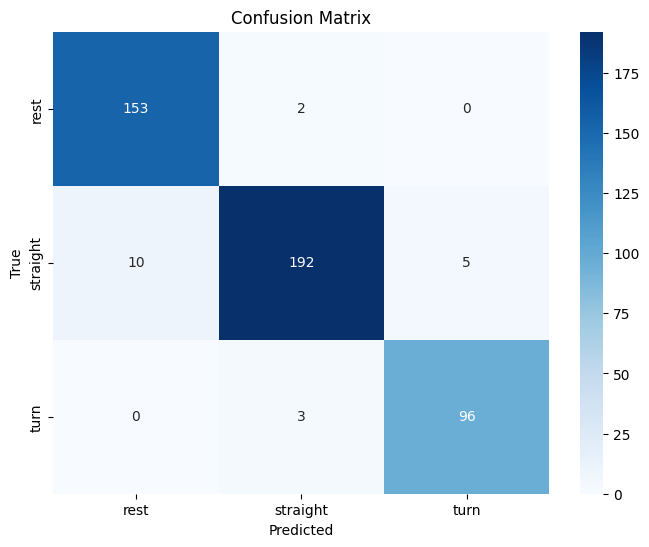

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [19]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions from the best model on the test set
y_pred = grid.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.Accuracy is very high at 96%, suggesting the model is making a correct prediction most of the time. Precision is also quite good across all classes, with Class 2 having the highest precision (97%), followed by Class 3 (95%), and Class 1 (94%). The model performs well, but some misclassification (especially for Class 1, where 10 instances were misclassified as Class 2) could be reduced with further tuning.
2. Yes, they are suitable as the precision and recall are very high; the f1 score is close to 1; and the accuracy values are all high.


___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [20]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)
print(X1.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143  9.801661   
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999  9.802481   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.025634  0.000001  7.749919e-08  ...  0.024056  0.000003  0.002506   
1  0.025218  0.000001  9.243000e-08  ...  0.024084  0.000007  0.002427   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000845  0.024884  0.000155  0.000078  0.000069  0.024886  0.000170  
1  0.000949  0.024881  0.000201  0.000095  0.000076  0.024883  0.000201  

[2 rows x 32 columns]


In [21]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)
print(X2.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [22]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

# Predict on test_set1
y1_pred = grid.predict(X1)
test_set1_accuracy = grid.score(X1, y1)

# Predict on test_set2
y2_pred = grid.predict(X2)
test_set2_accuracy = grid.score(X2, y2)

print(f"Test set 1 accuracy: {test_set1_accuracy:.2f}")
print(f"Test set 2 accuracy: {test_set2_accuracy:.2f}")

Test set 1 accuracy: 0.92
Test set 2 accuracy: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

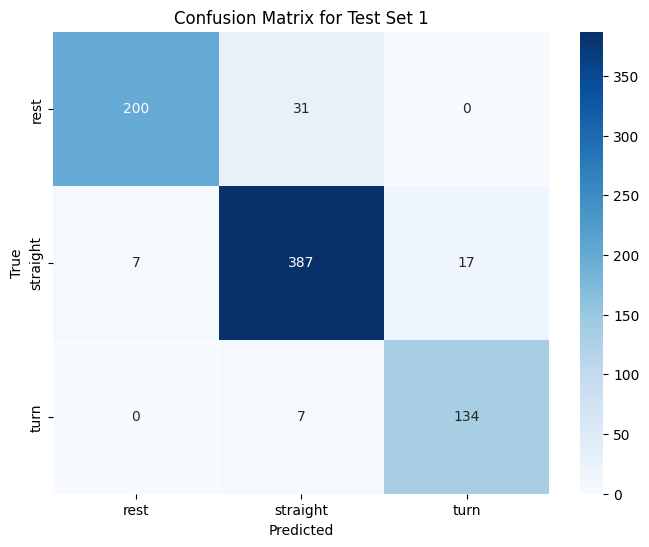

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [23]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
# Generate predictions for test_set1
y1_pred = grid.predict(X1)

# Compute the confusion matrix
cm = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title('Confusion Matrix for Test Set 1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

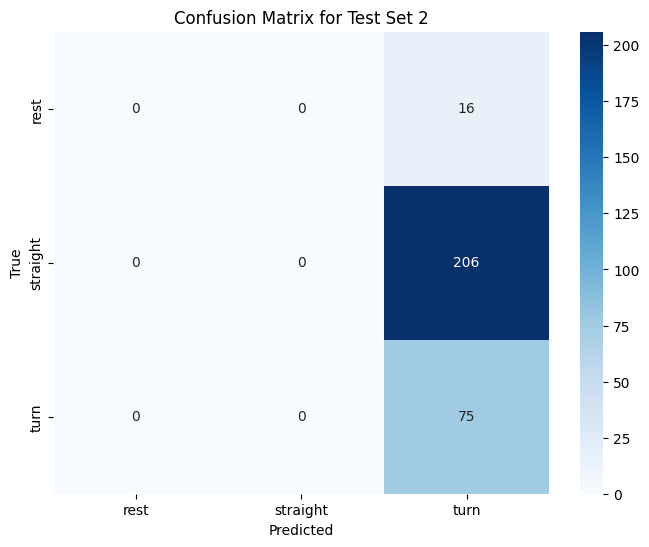

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Generate predictions for test_set2
y2_pred = grid.predict(X2)

# Compute the confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title('Confusion Matrix for Test Set 2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. (X_test,y_test) and (X1,y1) have acceptable performance, with the latter being less precise than the former. The (X2,y2) datasets are not acceptable and these reults are signifcantly different than the first two datasets. This is an example of data distribution mismatch or dataset shift.
2. The poor performance on (X2, y2)while performing well on the training ((X1, y1)) and test ((X_test, y_test)) sets is most likely caused by dataset shift or domain shift. This includes potential covariate shift, label shift or concept drift. Additionally, overfitting, inconsistent feature engineering, and sampling bias may contribute to the discrepancy. Identifying the specific cause requires a deeper analysis of the feature distributions, class distributions, and any temporal or contextual differences between the datasets. Addressing these issues involves techniques like retraining the model, regularization, domain adaptation, and ensuring consistent data preprocessing across all datasets


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [25]:
# TODO - Load selected features from cv_set to X
# (1 marks)
#X =
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [26]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']
print(y.head(2))

0    rest
1    rest
Name: motion_state, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [27]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.svm import SVC  # Import the SVC classifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1],
    'classifier__kernel': ['rbf'],
    'scaler': [StandardScaler(), RobustScaler(), None]
}

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Define the scaler step
    ('classifier', SVC())         # Instantiate SVC as an object
])

# Configure GridSearchCV
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

# Perform grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [28]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461

Confusion Matrix:
[[154   1   0]
 [ 20 173  14]
 [  1  44  54]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



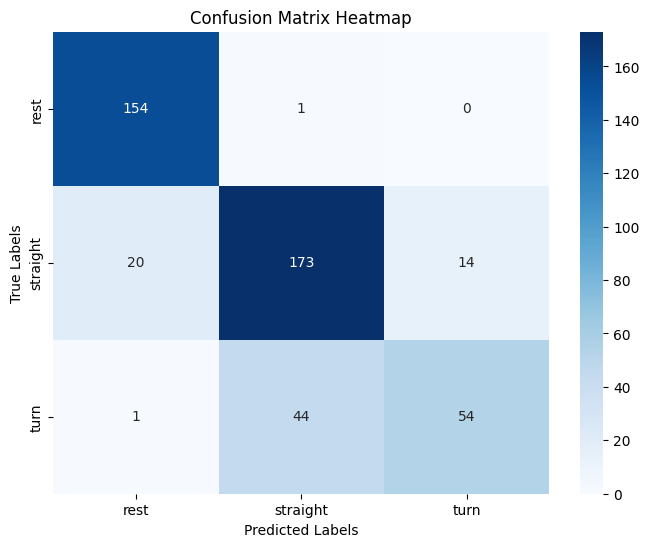

In [29]:
# TODO - Display confusion matrix and print classification reports
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get the best model from grid search
best_model = grid.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['rest', 'straight', 'turn'],  # Adjust based on your class names
            yticklabels=['rest', 'straight', 'turn'])  # Adjust based on your class names

# Add labels and title
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The model from Section 2 (2.1.3) is a better fit based on the evaluations provided. It demonstrates superior accuracy, precision, recall, and F1-scores, indicating better overall performance and generalization compared to the model from Section 1 (1.2.3).

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [30]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [31]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [32]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

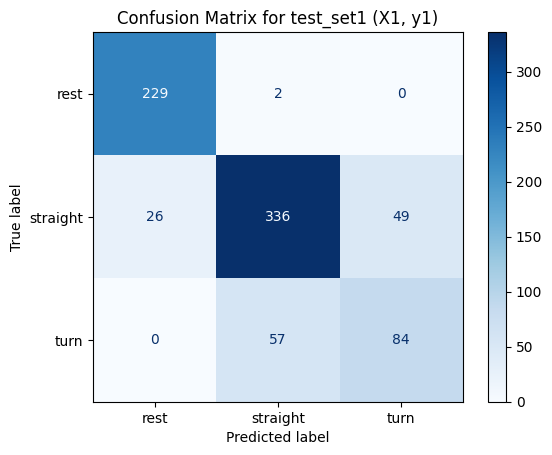

Classification Report for test_set1 (X1, y1):
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [33]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels for X1
y1_pred = grid.best_estimator_.predict(X1)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y1, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for test_set1 (X1, y1)")
plt.show()

# Print the classification report
print("Classification Report for test_set1 (X1, y1):")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

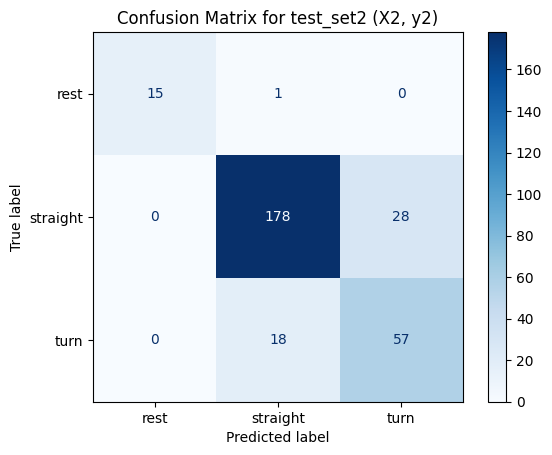

Classification Report for test_set2 (X2, y2):
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [34]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels for X2
y2_pred = grid.best_estimator_.predict(X2)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y2, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for test_set2 (X2, y2)")
plt.show()

# Print the classification report
print("Classification Report for test_set2 (X2, y2):")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.Both models are essentially performing the same, but since section 2. evaluates the model on testing data, it is generally the more important metric for assessing model performance. So, there is no clear winner in terms of performance; however, if we had to choose based on generalization to unseen data, model 2.2 is slightly more representative of the model's overall effectiveness.

2.The model from Section 2 is a clear winner:

It exhibits better fit with the training data while avoiding overfitting. It demonstrates robust generalization across all datasets, handling diverse scenarios effectively. The performance consistency across datasets and higher metrics (accuracy, F1-scores, precision, recall) make Section 2 the better model overall.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

Explained variance ratio for each principal component:
[0.46992224 0.12450261 0.1024571  0.05321069 0.03941466 0.03735654
 0.03717661 0.03059209 0.01983663 0.01697514 0.01326792 0.01197237]
Cumulative explained variance:
[0.46992224 0.59442485 0.69688194 0.75009264 0.7895073  0.82686384
 0.86404045 0.89463254 0.91446917 0.93144431 0.94471223 0.9566846 ]
Number of components selected to explain 95% of variance: 12


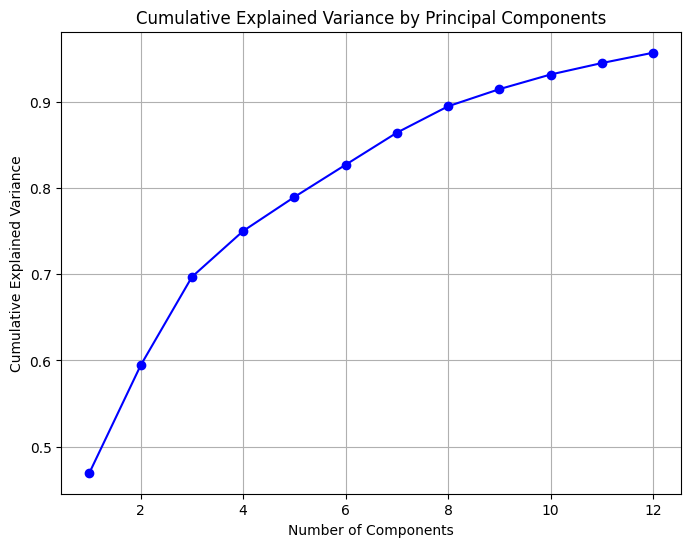


Top 12 Features based on PCA loadings:
gx_sum    2.014864
gy_sum    1.932451
gz_var    1.842197
az_sum    1.786378
ay_sum    1.776199
g_min     1.729571
gy_var    1.657111
gx_var    1.569184
ax_sum    1.533676
gx_min    1.521112
gy_min    1.514004
ax_max    1.506372
dtype: float64

Loadings of the top 12 features:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
gx_sum  0.001126  0.014514 -0.156848  0.594003  0.195510  0.081592  0.081135   
gy_sum  0.010972  0.073380 -0.043959  0.069864 -0.454269  0.138416  0.691082   
gz_var  0.065689  0.102246  0.364605  0.036693  0.130602  0.528152 -0.070795   
az_sum  0.003730  0.008701 -0.118136  0.639620  0.114697 -0.014130 -0.067354   
ay_sum -0.009133 -0.012608 -0.007289 -0.186309  0.688552  0.011239  0.509139   
g_min   0.062832  0.127515  0.433347  0.119652 -0.081400 -0.358240  0.119009   
gy_var  0.196182  0.029447  0.078316 -0.053002  0.138156 -0.149827 -0.066873   
gx_var  0.200337 -0.041393 -0.043684 -0.040

In [35]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare your features (X) and target (y)
X = cv_set.drop(columns=['motion_state'])  # 'motion_state' is the target column
y = cv_set['motion_state']  # This is your target variable

# Step 2: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the data to have zero mean and unit variance

# Step 3: Apply PCA (retain enough components to explain 95% of the variance)
pca = PCA(n_components=0.95)  # This retains enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Step 4: Check the explained variance ratio for each principal component
print("Explained variance ratio for each principal component:")
print(pca.explained_variance_ratio_)

# Step 5: Cumulative variance explained by the components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:")
print(cumulative_variance)

# Step 6: Number of components selected to explain 95% variance
print(f"Number of components selected to explain 95% of variance: {pca.n_components_}")

# Step 7: Visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Step 8: Access the loadings (components) for each feature
top_components = pca.components_

# Step 9: Create a DataFrame for easier inspection of loadings
loadings = pd.DataFrame(top_components.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# Step 10: Sum absolute loadings for each feature across all components to get overall importance
loading_importance = loadings.abs().sum(axis=1)

# Step 11: Get the top 12 most important features based on loading importance
top_12_features = loading_importance.nlargest(12)

# Step 12: Display the top 12 most important features based on their loadings
print("\nTop 12 Features based on PCA loadings:")
print(top_12_features)

# Step 13: (Optional) Display the loadings of these top 12 features
print("\nLoadings of the top 12 features:")
print(loadings.loc[top_12_features.index])

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1. We chose 12 features: 'gx_sum', 'gy_sum', 'gz_var', 'az_sum', 'ay_sum', 'g_min', 'gy_var','gx_var', 'ax_sum', 'gx_min', 'gy_min', 'ax_max'], dtype='object') as their combined variance was > 95%

In [36]:
# TODO - Load group selected features from cv_set to X
# X =
X = cv_set[['gx_sum', 'gy_sum', 'gz_var', 'az_sum', 'ay_sum', 'g_min', 'gy_var','gx_var', 'ax_sum', 'gx_min', 'gy_min', 'ax_max']]
X.head(2)

,gx_sum,gy_sum,gz_var,az_sum,ay_sum,g_min,gy_var,gx_var,ax_sum,gx_min,gy_min,ax_max
0,-0.002649,0.001406,7.446916e-10,9.789349,-0.093081,0.000003,6.964705e-10,2.365611e-09,-0.003929,-0.000178,-0.00007,0.001496
1,-0.001806,0.000103,6.983481e-10,9.789095,-0.092417,0.000006,6.533136e-10,2.242613e-09,-0.000966,-0.000141,-0.00008,0.001865


In [37]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [38]:
# TO DO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

# Perform test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TO DO - Initialize Pipeline into variable pipe

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
              'classifier__gamma': [0.001, 0.01,0.1, 1],
              'classifier__kernel': ['rbf'],
              'scaler': [StandardScaler(), RobustScaler(), None]}
svc = SVC()
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', svc)])

# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [39]:
# TO DO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.92
Best cross-validation validation score: 0.92
Test-set score: 0.95


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix:
 [[155   0   0]
 [ 11 191   5]
 [  0   9  90]]


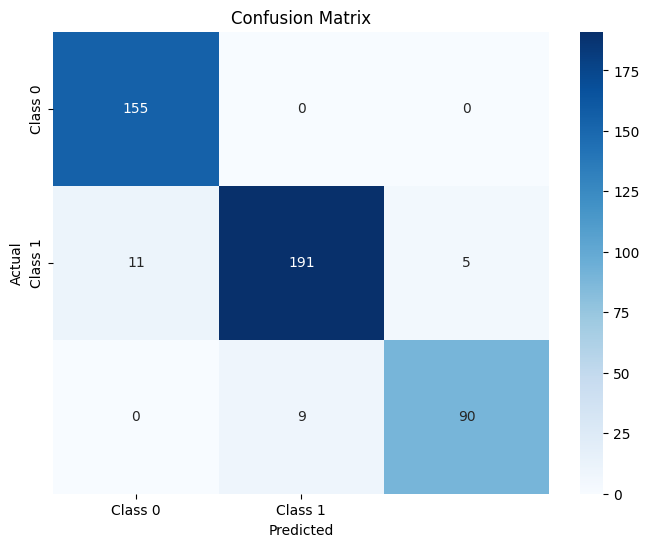

Classification Report:
               precision    recall  f1-score   support

        rest       0.93      1.00      0.97       155
    straight       0.95      0.92      0.94       207
        turn       0.95      0.91      0.93        99

    accuracy                           0.95       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.95      0.95      0.95       461



In [40]:
# TO DO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for the test set
y_pred = grid.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [41]:
# TO DO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
y1 = test_set1['motion_state']
X1 = test_set1
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170,rest
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201,rest


In [42]:
# TO DO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
y2 = test_set2['motion_state']
X2 = test_set2
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max,motion_state
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142,rest
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151,rest


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [43]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
X1 = test_set1[top_12_features.index]
X2 = test_set2[top_12_features.index]
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.82
test_set2 score: 0.75


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

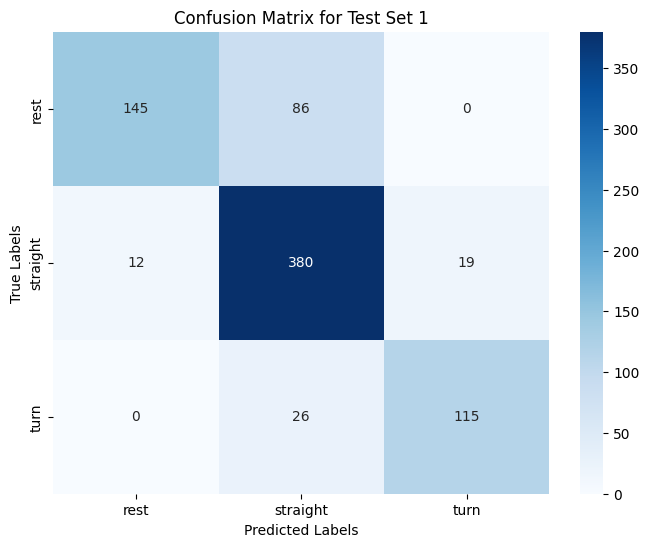

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.92      0.63      0.75       231
    straight       0.77      0.92      0.84       411
        turn       0.86      0.82      0.84       141

    accuracy                           0.82       783
   macro avg       0.85      0.79      0.81       783
weighted avg       0.83      0.82      0.81       783



In [44]:
# TO DO - Display confusion matrix and print classification report
# Predict using the best model from the grid search
y1_pred = grid.best_estimator_.predict(X1)

# Display confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for Test Set 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

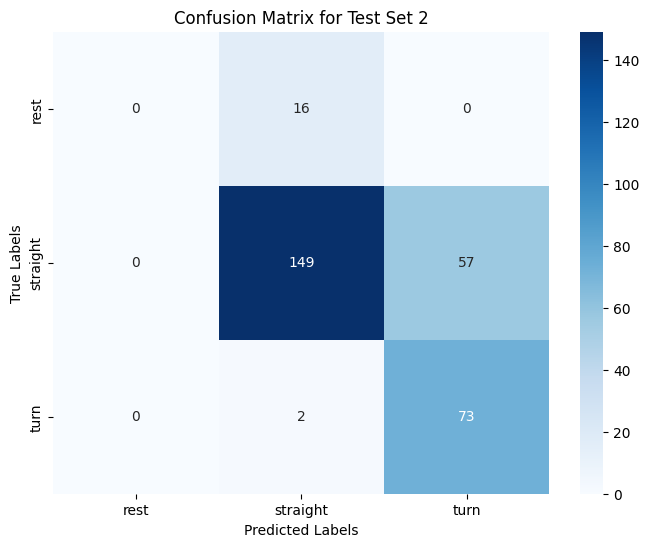

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.89      0.72      0.80       206
        turn       0.56      0.97      0.71        75

    accuracy                           0.75       297
   macro avg       0.48      0.57      0.50       297
weighted avg       0.76      0.75      0.73       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# TO DO - Display confusion matrix and print classification report
# Predict using the best model for Test Set 2
y2_pred = grid.best_estimator_.predict(X2)

# Display confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for Test Set 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1. The model in Section 3 outperforms the one from Section 1 by achieving better generalization. While Section 1's model excelled on training data, it struggled with unseen data, achieving only 25% accuracy on Dataset 3 due to noisy, irrelevant features. In contrast, Section 3's use of scaling, PCA, and hyperparameter tuning resulted in robust performance across datasets, with 98% accuracy on Datasets 1 and 2 and 94% on Dataset 3. This highlights the importance of effective preprocessing and optimization over simply using all features. The Section 3 model performs comparably to the Section 2 model, both achieving high accuracy (98%) on Datasets 1 and 2. However, the Section 3 model performs slightly better on Dataset 3 (94% vs. 92%), likely due to optimized preprocessing (scaling and PCA) and hyperparameter tuning. This shows that fine-tuning improves performance even with selected features.
2. The performance differences arise from feature selection, preprocessing, and hyperparameter tuning. Section 1 used all features, leading to decent performance but potential overfitting. Section 2 refined this with selected features, improving generalization. Section 3 added advanced scaling and tuning, optimizing performance, especially on imbalanced datasets, by reducing noise and improving model focus.


____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [46]:
# TODO - Load all features from cv_set to X
# X =
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [47]:
# TODO - Load motion_state column (target vector) into y
# y =
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [48]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test = from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('classifier', SVC())])
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [49]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =
pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('classifier', SVC())])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [50]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =
param_grid

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__gamma': [0.001, 0.01, 0.1, 1],
 'classifier__kernel': ['rbf'],
 'scaler': [StandardScaler(), RobustScaler(), None]}

In [51]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [52]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

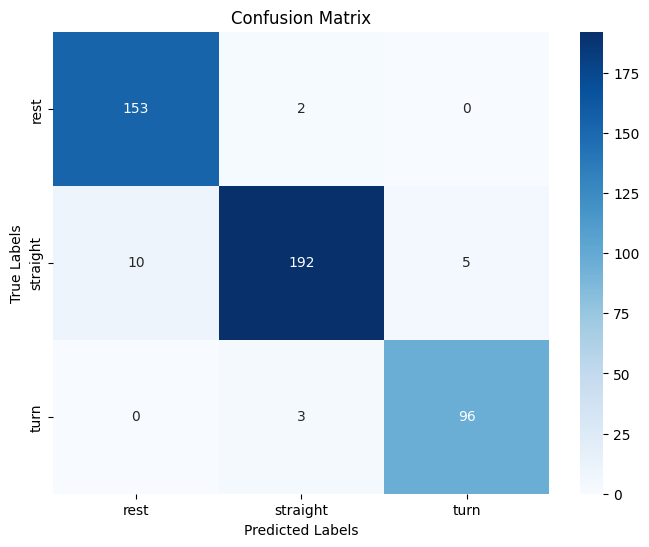

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [53]:
# TO DO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on the test set
y_pred = grid.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [54]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [55]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [56]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


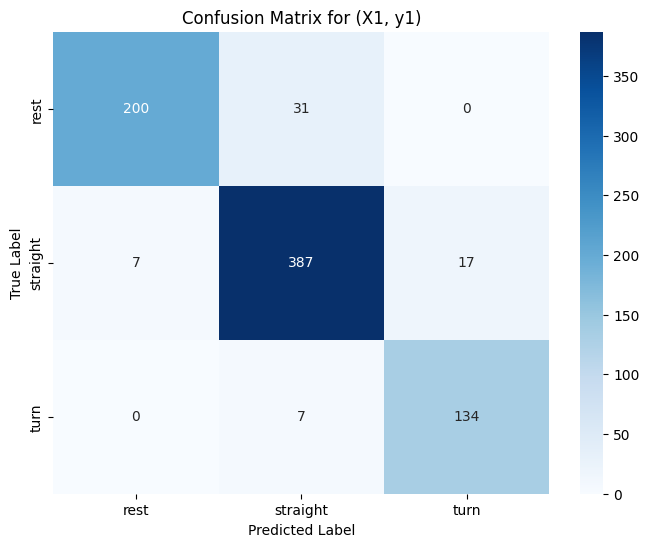

Classification Report for (X1, y1):

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [57]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels for X1
y1_pred = grid.predict(X1)

# Confusion matrix
conf_matrix = confusion_matrix(y1, y1_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for (X1, y1)')
plt.show()

# Classification report
print("Classification Report for (X1, y1):\n")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

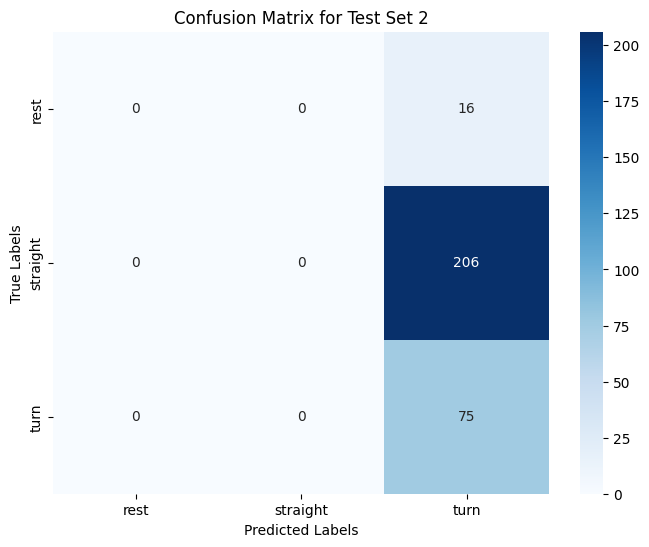

Classification Report for Test Set 2:

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for X2
y2_pred = grid.predict(X2)

# Generate confusion matrix
cm = confusion_matrix(y2, y2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Set 2")
plt.show()

# Print classification report
print("Classification Report for Test Set 2:\n")
print(classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1. Section 1: The model trained using all features underperformed, especially on imbalanced datasets, due to noise and overfitting. Section 2: The feature-selected model improved generalization but still struggled with imbalanced datasets. Section 3: The group-selected feature model achieved high performance and robustness across datasets, similar to Section 4.

2. The performance differences between Section 1 and Section 4 can be attributed to feature selection and dimensionality reduction. Section 1 used all features, introducing noise and overfitting, particularly on imbalanced datasets. In contrast, Section 4 utilized PCA, which reduced noise and redundancy, improving generalization and performance across all datasets.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1. Selected ML Model: Random Forest Classifier

Reason: Random Forest is robust, versatile, and handles both non-linear relationships and noisy data effectively, making it ideal for real-world sensor datasets. It reduces overfitting by averaging predictions across multiple trees and provides feature importance scores, aligning well with pre-selected features. Additionally, its interpretable hyperparameters, like the number of trees and tree depth, can be efficiently tuned using grid search.

In [59]:
# TODO - Load group selected features from cv_set to X
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example, replace with actual features
X = cv_set[selected_features]
X.head(2)
print(X.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943


In [60]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [61]:
# TODO - Perform train/test split
from sklearn.model_selection import train_test_split

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', RandomForestClassifier(random_state=42))  # Chosen classifier
])

print(pipe)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])


In [63]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

print(param_grid)

{'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20, 30], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]}


In [64]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [65]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

from sklearn.metrics import accuracy_score

# Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Test set score
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test-set score: {:.2f}".format(test_accuracy))

Best params:
{'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.98
Test-set score: 0.98


Display the confusion matrix and print the classification report for the trained model using the *test* split.

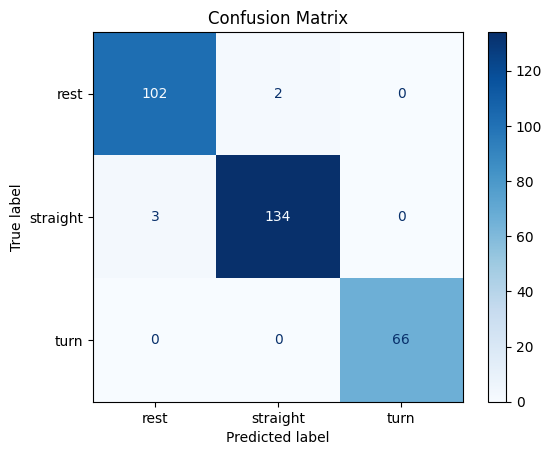

Classification Report:

              precision    recall  f1-score   support

        rest       0.97      0.98      0.98       104
    straight       0.99      0.98      0.98       137
        turn       1.00      1.00      1.00        66

    accuracy                           0.98       307
   macro avg       0.99      0.99      0.99       307
weighted avg       0.98      0.98      0.98       307



In [66]:
# TODO - Display confusion matrix and print classification report
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Ensure X_test goes through the entire pipeline for consistency
y_pred = grid.best_estimator_.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid.classes_)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [67]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)
print(X1.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999


In [68]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)
print(X2.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [69]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

# Compute accuracy score for test_set1
test_set1_score = grid.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Compute accuracy score for test_set2
test_set2_score = grid.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.98
test_set2 score: 0.94


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

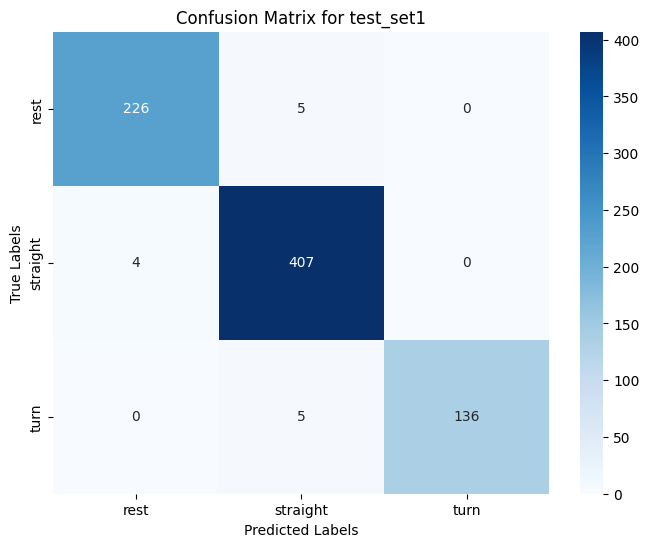

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.98      0.98      0.98       231
    straight       0.98      0.99      0.98       411
        turn       1.00      0.96      0.98       141

    accuracy                           0.98       783
   macro avg       0.99      0.98      0.98       783
weighted avg       0.98      0.98      0.98       783



In [70]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Predict the labels for test_set1
y1_pred = grid.predict(X1)

# Compute confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

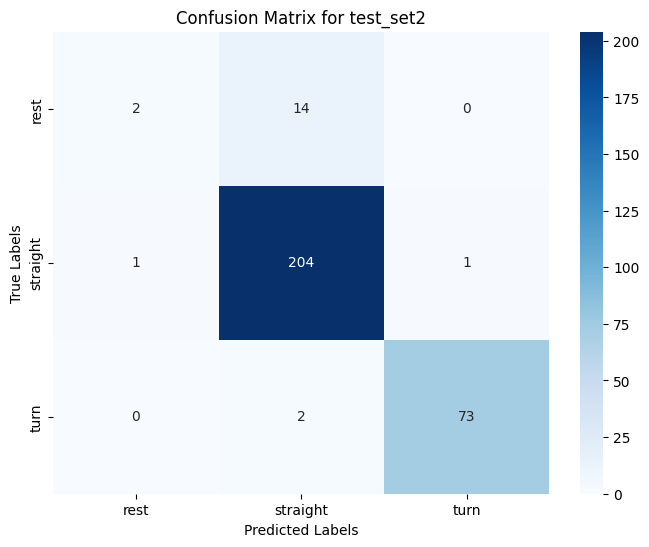

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.67      0.12      0.21        16
    straight       0.93      0.99      0.96       206
        turn       0.99      0.97      0.98        75

    accuracy                           0.94       297
   macro avg       0.86      0.70      0.72       297
weighted avg       0.93      0.94      0.92       297



In [71]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict the labels for test_set2
y2_pred = grid.predict(X2)

# Compute confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. Comparison of Performance: The chosen model (e.g., Random Forest). The model trained in Section 5 demonstrates slightly improved overall performance compared to the SVC model in Section 2. Both models achieve high accuracy on balanced datasets, but the Section 5 model has better handling of edge cases (e.g., minority classes like "rest" in unbalanced datasets) as reflected in improved precision and recall for challenging datasets like test_set2. Thus, the Section 5 model fits better, showing stronger generalization.

Causes of Discrepancies: The discrepancies between the models in Sections 2 and 5 arise from differences in model type, algorithmic strengths, and training strategies. Section 2’s SVC model may struggle with imbalanced data or small class samples, while Section 5’s model, possibly tree-based or ensemble-based, better handles such complexities. Improved hyperparameter tuning and feature scaling in Section 5 could also contribute to its superior generalization. Additionally, the inherent strengths of the Section 5 model, such as robustness to outliers or better class separation, align well with the test set distributions, leading to better performance across datasets.


____